In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import pygeos
import rtree

/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Merging OSM features and PR

## Creating a GeoDataFrame with OSM features and filtering results

In [ ]:
from sklearn.preprocessing import OneH

In [24]:
schools = gpd.read_file('../raw_data/maps/schools.shp')

In [41]:
schools2 = schools.buffer(500)

<AxesSubplot:>

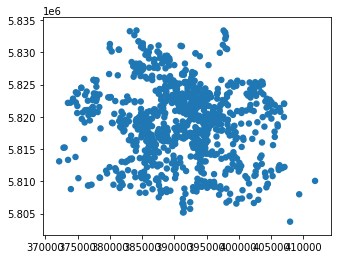

In [42]:
schools2.plot()

In [2]:
df_osm = gpd.read_file('../raw_data/social_eating.csv')

DriverError: ../raw_data/social_eating.csv: No such file or directory

In [29]:
def open_filter(df):
    df.drop(columns='geometry')
    geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs='epsg:4326')
    geo_df['lat_num'] = geo_df['lat'].astype(float)
    geo_df['lon_num'] = geo_df['lon'].astype(float)
    geo_df_filtered = geo_df[(geo_df.lat_num>50) & (geo_df.lon_num > 12)]
    geo_df_filtered.to_crs(crs='epsg:25833', inplace=True)
    return geo_df_filtered
    

In [30]:
open_filter(df_osm)

/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,lat,lon,coor,geometry,lat_num,lon_num
0,52.506911,13.3228214,"(52.506911, 13.3228214)",POINT (386170.021 5818742.773),52.506911,13.322821
1,52.5062119,13.3180811,"(52.5062119, 13.3180811)",POINT (385846.509 5818672.503),52.506212,13.318081
2,52.5073199,13.3207804,"(52.5073199, 13.3207804)",POINT (386032.566 5818791.471),52.507320,13.320780
3,52.5063184,13.2846256,"(52.5063184, 13.2846256)",POINT (383576.306 5818737.771),52.506318,13.284626
4,52.5388551,13.3960965,"(52.5388551, 13.3960965)",POINT (391221.802 5822182.638),52.538855,13.396097
...,...,...,...,...,...,...
6774,52.5334984,13.3663195,"(52.5334984, 13.3663195)",POINT (389188.952 5821632.159),52.533498,13.366319
6775,52.5041511,13.3294444,"(52.5041511, 13.3294444)",POINT (386612.387 5818425.395),52.504151,13.329444
6776,52.501496,13.4188985,"(52.501496, 13.4188985)",POINT (392677.136 5817993.369),52.501496,13.418898
6777,52.494043,13.3833987,"(52.494043, 13.3833987)",POINT (390249.065 5817217.799),52.494043,13.383399


## Making spatial join intersects and nearest with PR 

<AxesSubplot:>

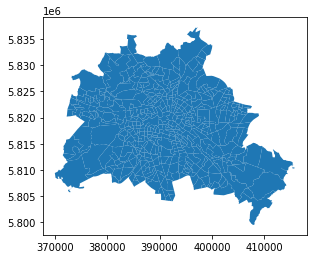

In [31]:
pr_2021 = gpd.read_file('../raw_data/Maps/pr_2021.shp')

pr_2021.plot()

/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

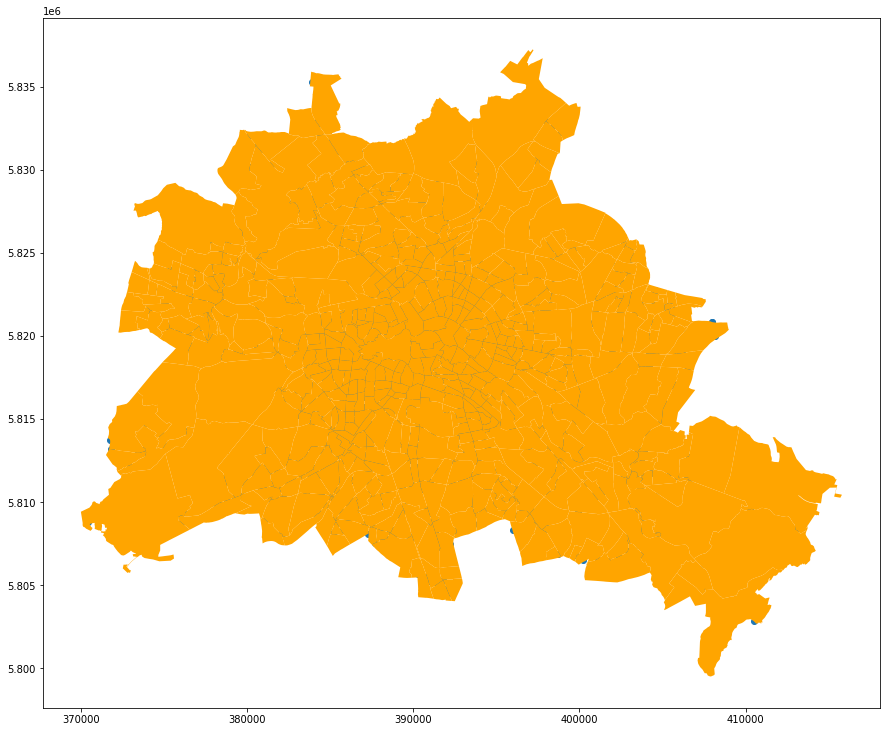

In [33]:
fig, ax = plt.subplots(figsize=(15, 15))
open_filter(df_osm).plot(ax=ax)
pr_2021.plot(ax = ax, color='orange')

In [34]:
def spatial_nearest(df, target, feature_name):
    nearest = df.sjoin_nearest(target, how='left')
    feature_df = nearest.groupby(by='PLR_ID').size().reset_index()
    feature_df.columns = ['PLR_ID', feature_name]
    merged = target.merge(feature_df, on='PLR_ID', how= 'left')
    return merged

In [35]:
spatial_nearest(open_filter(df_osm), pr_2021, 'soc_eat')

/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,PLR_ID,PLR_NAME,BZR_ID,BZR_NAME,PGR_ID,PGR_NAME,BEZ,FINHALT,STAND,geometry,soc_eat
0,11501341,Karlshorst Süd,115013,Karlshorst,1150,Lichtenberg Süd,11,2.294054e+06,01.01.2021,"POLYGON ((399848.954 5815619.506, 399854.727 5...",10.0
1,03701659,Immanuelkirchstraße,037016,Prenzlauer Berg Süd,0370,Südlicher Prenzlauer Berg,03,4.115167e+05,01.12.2021,"POLYGON ((393175.012 5821135.577, 393167.174 5...",26.0
2,07601340,Tirschenreuther Ring Ost,076013,Marienfelde Süd,0760,Marienfelde / Lichtenrade,07,4.139754e+05,01.01.2021,"POLYGON ((388394.110 5807792.070, 388379.276 5...",2.0
3,02500831,Wismarplatz,025008,Frankfurter Allee Süd FK,0250,Friedrichshain Ost,02,2.489918e+05,01.01.2021,"POLYGON ((396010.552 5819339.570, 396021.567 5...",14.0
4,12601134,Märkisches Zentrum,126011,MV Nord,1260,Märkisches Viertel,12,1.127871e+06,01.01.2021,"POLYGON ((387367.428 5828619.763, 387315.862 5...",3.0
...,...,...,...,...,...,...,...,...,...,...,...
537,12500927,Wittenau Nord,125009,Nord 2 - Waidmannslust/Wittenau/Lübars,1250,Wittenau/Borsigwalde,12,2.494710e+06,01.01.2021,"POLYGON ((387280.650 5828614.114, 387266.882 5...",9.0
538,03200204,Blankenfelde,032002,Blankenfelde/Niederschönhausen,0320,Nördliches Pankow,03,1.306805e+07,01.01.2021,"POLYGON ((392586.179 5829994.574, 392586.626 5...",3.0
539,10400941,Pilgramer Straße,104009,Mahlsdorf,1040,Kaulsdorf/Mahlsdorf,10,3.691050e+06,01.01.2021,"POLYGON ((406064.851 5815581.891, 406061.455 5...",6.0
540,08100101,Hasenheide,081001,Schillerpromenade,0810,Neukölln,08,8.663653e+05,01.01.2021,"POLYGON ((391887.140 5816592.598, 391898.686 5...",6.0


In [37]:
def spatial_intersect(df, target, feature_name):
    nearest = df.sjoin(target, how='left', predicate = 'intersects')
    feature_df = nearest.groupby(by='PLR_ID').size().reset_index()
    feature_df.columns = ['PLR_ID', feature_name]
    merged = target.merge(feature_df, on='PLR_ID', how= 'left')
    return merged

In [38]:
spatial_intersect(open_filter(df_osm), pr_2021, 'soc_eat')

/Users/Safia/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,PLR_ID,PLR_NAME,BZR_ID,BZR_NAME,PGR_ID,PGR_NAME,BEZ,FINHALT,STAND,geometry,soc_eat
0,11501341,Karlshorst Süd,115013,Karlshorst,1150,Lichtenberg Süd,11,2.294054e+06,01.01.2021,"POLYGON ((399848.954 5815619.506, 399854.727 5...",10.0
1,03701659,Immanuelkirchstraße,037016,Prenzlauer Berg Süd,0370,Südlicher Prenzlauer Berg,03,4.115167e+05,01.12.2021,"POLYGON ((393175.012 5821135.577, 393167.174 5...",26.0
2,07601340,Tirschenreuther Ring Ost,076013,Marienfelde Süd,0760,Marienfelde / Lichtenrade,07,4.139754e+05,01.01.2021,"POLYGON ((388394.110 5807792.070, 388379.276 5...",2.0
3,02500831,Wismarplatz,025008,Frankfurter Allee Süd FK,0250,Friedrichshain Ost,02,2.489918e+05,01.01.2021,"POLYGON ((396010.552 5819339.570, 396021.567 5...",14.0
4,12601134,Märkisches Zentrum,126011,MV Nord,1260,Märkisches Viertel,12,1.127871e+06,01.01.2021,"POLYGON ((387367.428 5828619.763, 387315.862 5...",3.0
...,...,...,...,...,...,...,...,...,...,...,...
537,12500927,Wittenau Nord,125009,Nord 2 - Waidmannslust/Wittenau/Lübars,1250,Wittenau/Borsigwalde,12,2.494710e+06,01.01.2021,"POLYGON ((387280.650 5828614.114, 387266.882 5...",9.0
538,03200204,Blankenfelde,032002,Blankenfelde/Niederschönhausen,0320,Nördliches Pankow,03,1.306805e+07,01.01.2021,"POLYGON ((392586.179 5829994.574, 392586.626 5...",3.0
539,10400941,Pilgramer Straße,104009,Mahlsdorf,1040,Kaulsdorf/Mahlsdorf,10,3.691050e+06,01.01.2021,"POLYGON ((406064.851 5815581.891, 406061.455 5...",6.0
540,08100101,Hasenheide,081001,Schillerpromenade,0810,Neukölln,08,8.663653e+05,01.01.2021,"POLYGON ((391887.140 5816592.598, 391898.686 5...",6.0
